<a href="https://colab.research.google.com/github/Zainabb110/CS584-Project/blob/main/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive 
drive.mount('/content/gdrive')
fileName = 'gdrive/My Drive/Colab Notebooks/expenses.csv'
data = pd.read_csv(fileName)
data.head()


Mounted at /content/gdrive


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#@title
import numpy as np
# f = open(fileName)
# header = f.readline()
# data = np.loadtxt(f)
#dataset = np.loadtxt(fileName, delimiter=',', header = True)

age = data['age'].tolist()
sex = data['sex'].tolist()
bmi = data['bmi'].tolist()
children = data['children'].tolist()
smoker = data['smoker'].tolist()
region = data['region'].tolist()

y = data['charges'].tolist()
X = [age, sex, bmi, children, smoker, region]

print("X: ", X)
print("y: ", y)


X:  [[19, 18, 28, 33, 32, 31, 46, 37, 37, 60, 25, 62, 23, 56, 27, 19, 52, 23, 56, 30, 60, 30, 18, 34, 37, 59, 63, 55, 23, 31, 22, 18, 19, 63, 28, 19, 62, 26, 35, 60, 24, 31, 41, 37, 38, 55, 18, 28, 60, 36, 18, 21, 48, 36, 40, 58, 58, 18, 53, 34, 43, 25, 64, 28, 20, 19, 61, 40, 40, 28, 27, 31, 53, 58, 44, 57, 29, 21, 22, 41, 31, 45, 22, 48, 37, 45, 57, 56, 46, 55, 21, 53, 59, 35, 64, 28, 54, 55, 56, 38, 41, 30, 18, 61, 34, 20, 19, 26, 29, 63, 54, 55, 37, 21, 52, 60, 58, 29, 49, 37, 44, 18, 20, 44, 47, 26, 19, 52, 32, 38, 59, 61, 53, 19, 20, 22, 19, 22, 54, 22, 34, 26, 34, 29, 30, 29, 46, 51, 53, 19, 35, 48, 32, 42, 40, 44, 48, 18, 30, 50, 42, 18, 54, 32, 37, 47, 20, 32, 19, 27, 63, 49, 18, 35, 24, 63, 38, 54, 46, 41, 58, 18, 22, 44, 44, 36, 26, 30, 41, 29, 61, 36, 25, 56, 18, 19, 39, 45, 51, 64, 19, 48, 60, 27, 46, 28, 59, 35, 63, 40, 20, 40, 24, 34, 45, 41, 53, 27, 26, 24, 34, 53, 32, 19, 42, 55, 28, 58, 41, 47, 42, 59, 19, 59, 39, 40, 18, 31, 19, 44, 23, 33, 55, 40, 63, 54, 60, 24, 19

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42,shuffle=True)

#print(train['charges'])
#print(test)

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64
      age     sex     bmi  children smoker     region      charges
764    45  female  25.175         2     no  northeast   9095.06825
887    36  female  30.020         0     no  northwest   5272.17580
890    64  female  26.885         0    yes  northwest  29330.98315
1293   46    male  25.745         3     no  northwest   9301.89355
259    19    male  31.920         0    yes  northwest  33750.29180
...   ...     ...     ...       ...    ...        ...          ...
109    63    male  35.090         0    yes  southeast  47055.53210
575    58  female  27.170         0     no  northwest  12222.89830
535    38    male  28.025         1     no  northeast   6067.12675
543    54  female  47.410         0    yes  southeast  63770.42801

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = linear_model.LinearRegression()
data = train
y = data.pop('charges')
X = pd.get_dummies(data, columns = ["sex", "smoker", "region"], drop_first = True)
print(X)
print(y)
model.fit(X, y)

      age     bmi  children  sex_male  smoker_yes  region_northwest  \
560    46  19.950         2         0           0                 1   
1285   47  24.320         0         0           0                 0   
1142   52  24.860         0         0           0                 0   
969    39  34.320         5         0           0                 0   
486    54  21.470         3         0           0                 1   
...   ...     ...       ...       ...         ...               ...   
1095   18  31.350         4         0           0                 0   
1130   39  23.870         5         0           0                 0   
1294   58  25.175         0         1           0                 0   
860    37  47.600         2         0           1                 0   
1126   55  29.900         0         1           0                 0   

      region_southeast  region_southwest  
560                  0                 0  
1285                 0                 0  
1142              

LinearRegression()

In [ ]:

test_y = test.pop('charges')
test = pd.get_dummies(test, columns = ["sex", "smoker", "region"], drop_first = True)
y_pred = model.predict(test)

In [ ]:
y_pred_train = model.predict(X)

In [ ]:
print(test)
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

print("MSE: ", mean_squared_error(test_y, y_pred))
print("test RMSE: ", mean_squared_error(test_y, y_pred)**0.5)
print("train RMSE:", mean_squared_error(y, y_pred_train)**0.5)
print("R2: ", r2_score(test_y, y_pred))

      age     bmi  children  sex_male  smoker_yes  region_northwest  \
764    45  25.175         2         0           0                 0   
887    36  30.020         0         0           0                 1   
890    64  26.885         0         0           1                 1   
1293   46  25.745         3         1           0                 1   
259    19  31.920         0         1           1                 1   
...   ...     ...       ...       ...         ...               ...   
109    63  35.090         0         1           1                 0   
575    58  27.170         0         0           0                 1   
535    38  28.025         1         1           0                 0   
543    54  47.410         0         0           1                 0   
846    51  34.200         1         0           0                 0   

      region_southeast  region_southwest  
764                  0                 0  
887                  0                 0  
890               

Text(0, 0.5, 'Predicted Training y')

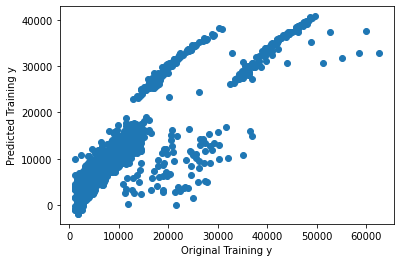

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y, y_pred_train)
plt.xlabel("Original Training y")
plt.ylabel("Predicted Training y")

Text(0, 0.5, 'Predicted Testing y')

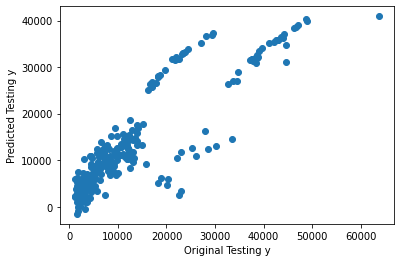

In [ ]:
plt.scatter(test_y, y_pred)
plt.xlabel("Original Testing y")
plt.ylabel("Predicted Testing y")